<a href="https://colab.research.google.com/github/VivekVardhankanumala/fml/blob/main/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [ ]:
data=pd.read_csv("/content/Air_Traffic_Passenger_Statistics.csv.zip")



In [ ]:
data.head(5)

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [ ]:
data.shape

(15007, 17)

In [ ]:
data.tail

<bound method NDFrame.tail of        index  Activity Period Operating Airline Operating Airline IATA Code  \
0          0           200507      ATA Airlines                          TZ   
1          1           200507      ATA Airlines                          TZ   
2          2           200507      ATA Airlines                          TZ   
3          3           200507       Air Canada                           AC   
4          4           200507       Air Canada                           AC   
...      ...              ...               ...                         ...   
15002  15002           201603    Virgin America                          VX   
15003  15003           201603    Virgin America                          VX   
15004  15004           201603    Virgin America                          VX   
15005  15005           201603   Virgin Atlantic                          VS   
15006  15006           201603   Virgin Atlantic                          VS   

      Published Airli

In [ ]:
data.tail(5)

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
15002,15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March
15006,15006,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,10898,Enplaned,10898,2016,March


In [ ]:
data['Year'] = pd.to_datetime(data['Year'], infer_datetime_format=True)
indexedData = data.set_index(['Year'])
     

In [ ]:
indexedData.head(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
index,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1970-01-01 00:00:00.000000001,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
1970-01-01 00:00:00.000000002,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
1970-01-01 00:00:00.000000003,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
1970-01-01 00:00:00.000000004,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


ConversionError: ignored

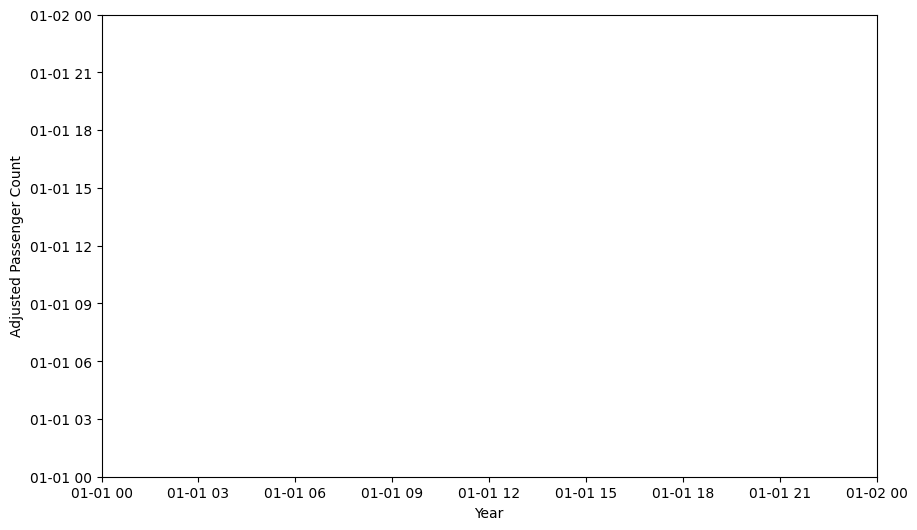

In [ ]:
plt.xlabel("Year")
plt.ylabel("Adjusted Passenger Count")
plt.plot(indexedData)
     


In [ ]:
drop(["Operating Airline",	" Operating Airline IATA Code",	"Published Airline",	"Published Airline IATA Code	GEO Summary	GEO Region	Activity Type Code	Price Category Code	Terminal	Boarding Area	"])

NameError: ignored